# 3.1 - Ultimate EDA

Definition:

* active = took a trip in preceding 30 days


Data Description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=2)

In [8]:
data = pd.read_json('ultimate_data_challenge.json', 
                    convert_dates=["signup_date", "last_trip_date"])

Columns With Missing Data:
* avg_rating_of_driver - impute with average is probably ok
* phone - there is only 300 entries that don't have phone - we can drop these rows
* avg_rating_by_driver - imput with average is probably ok

Other conversion:
* city - categorical data
* phone - categorical data

Missing data:
* active - our label column

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

# Columns to Encode

One Hot Encode since these are categorical data:
* ultimate_black_user
* phone
* city

# Columns to Normalize

We need to normalize the values for the following ratio data

* trips_in_first_30_days
* avg_rating_of_driver
* avg_surge
* surge_pct
* weekday_pct
* avg_dist
* avg_rating_by_driver

In [5]:
data.sample(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
17881,Astapor,6,2014-01-18,4.9,1.21,2014-06-22,iPhone,29.2,True,58.3,5.44,4.6
28255,Winterfell,14,2014-01-26,3.9,1.07,2014-06-30,iPhone,3.1,True,65.6,3.52,4.4
19979,King's Landing,14,2014-01-18,4.9,1.08,2014-06-26,iPhone,9.4,True,86.8,3.49,4.8
33503,Winterfell,0,2014-01-26,4.9,1.00,2014-06-07,iPhone,0.0,False,47.4,2.27,4.8
43301,Winterfell,1,2014-01-05,4.8,1.00,2014-06-03,iPhone,0.0,True,44.4,2.49,5.0
7309,Winterfell,0,2014-01-20,NaN,1.00,2014-05-14,iPhone,0.0,False,100.0,15.40,3.0
5792,Winterfell,4,2014-01-10,4.9,1.03,2014-04-29,Android,6.7,False,60.0,11.39,4.9
16933,King's Landing,1,2014-01-12,5.0,1.00,2014-04-23,iPhone,0.0,False,50.0,14.73,5.0
44569,Winterfell,0,2014-01-01,5.0,1.38,2014-05-27,Android,50.0,True,100.0,8.20,5.0
8946,Astapor,2,2014-01-23,5.0,1.00,2014-05-24,iPhone,0.0,False,81.8,1.16,4.8


## Quick check for data intergrity

* All star rating columns looks to be correct in the sense that 0 is the min and 5 is the max
* min distance == 0
* min trip == 0
* min surge pct == 0

Something that looks odd
* avg_dist min == 0

In [11]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Look at avg_dist more closely

Looks like there are 94 rows in the dataset where average distance for trips is 0 miles but the user has taken 1 or more trips

The data estimates avg_dist by 2 decimals, this definitely does not sound right -> we will have to drop these from our dataset

In [39]:
data[(data.avg_dist == 0) & (data.trips_in_first_30_days > 0)][["avg_dist", "trips_in_first_30_days"]]

,avg_dist,trips_in_first_30_days
72,0.0,1
116,0.0,1
188,0.0,1
356,0.0,1
479,0.0,1
...,...,...
46786,0.0,1
46948,0.0,2
47854,0.0,1
49989,0.0,1


Last date for report is 7/1 midnight - we will calculate active based on 30 days from this date

In [9]:
print(f'First trip date: {data.last_trip_date.min()}')
print(f'Last trip date: {data.last_trip_date.max()}')

First trip date: 2014-01-01 00:00:00
Last trip date: 2014-07-01 00:00:00


# Missing Phone Data

We have 396 missing entries for phone column. Let's look at the data more closely to see if we can impute this data

One way we could impute the data is to assume that they are iPhones (the majority class), however, out of 300 missing phone data 30% is probably Android phones, so 118 of them would be wrong.

2 options here:
1. drop missing rows for phone
2. create an unknown categories for phones

Probably makes more sense to just drop the rows since phones are either iphones or android, adding a new category would imply there is a new type of phone which we probably don't have. Also, the number of rows we would be dropping is less than 1% which is low

This column will have to be one hot encoded


In [27]:
data = data.fillna({"phone": "unknown"})
phone_df = data[["phone", "city"]].groupby("phone").count().rename({"city": "total"}, axis=1).reset_index()
phone_df["phone_percentage"] = phone_df.total / len(data)
phone_df

,phone,total,phone_percentage
0,Android,15022,0.30044
1,iPhone,34582,0.69164
2,unknown,396,0.00792


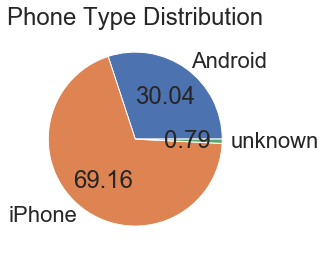

In [47]:
_ = plt.pie(phone_df["phone_percentage"], labels=phone_df.phone, autopct='%.2f')
_ = plt.title("Phone Type Distribution")

# Class Distribution

We do have a class imbalanced between active and inactive users. As suspected, there are more inactive users than there are active users.

We will probably want to use class weights or some type of sampling method if we want to improve our model.

In [40]:
data["active"] = (data.last_trip_date.max().month - data.last_trip_date.dt.month) == 1
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [44]:
active_df = data[["active", "city"]].rename({"city":"total"}, axis=1).groupby("active").count().reset_index()
active_df["active_percentage"] = active_df.total / active_df.total.sum()
active_df

,active,total,active_percentage
0,False,31744,0.63488
1,True,18256,0.36512


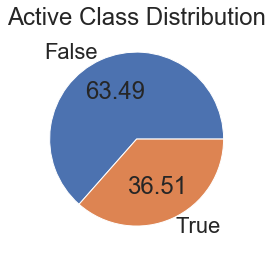

In [46]:
_ = plt.pie(active_df["active_percentage"], labels=active_df.active, autopct='%.2f')
_ = plt.title("Active Class Distribution")

# City Data

Get a sense of how many cities we have - looks like there is only 3 so very manageable to one hot encode

In [48]:
data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

# Signup Month

Let's look at user sign-up month to get a better sense of what to do with this data

sign-ups look to be some what cyclical - around every 7 days with most sign-ups on Friday and Saturdays

Couple things we could do with this column:

1. drop - assume the sign up date does not affect user behavior
2. extract features from this column: 
    * For day of month, we will probably want to bin these so we don't have too many features - maybe 2 bins for each half of the month or 3 bins for 3rd's of the month
    * For day of week, there is only 7 features so we should one hot encode them

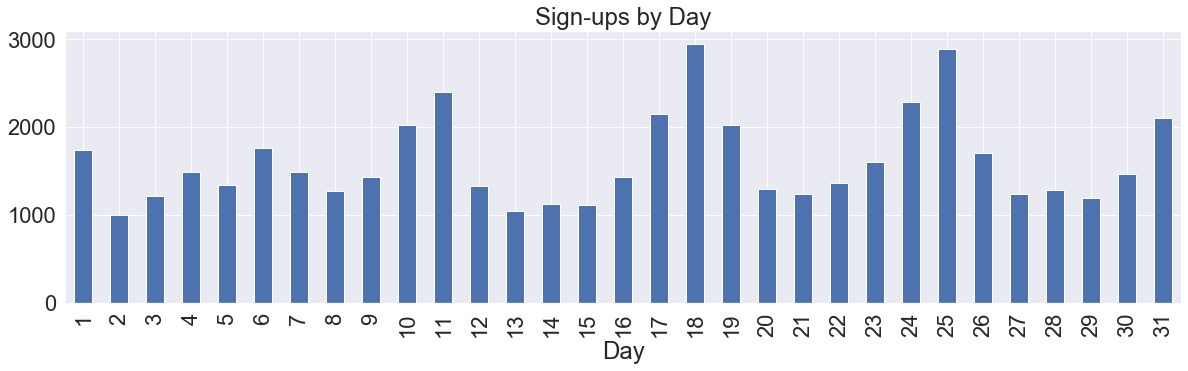

In [66]:
data["signup_day"] = data.signup_date.dt.day

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = data.groupby("signup_day").count()["city"].plot(kind='bar', ax=a, legend=False)
_ = a.set_xlabel("Day")
_ = a.set_title("Sign-ups by Day")

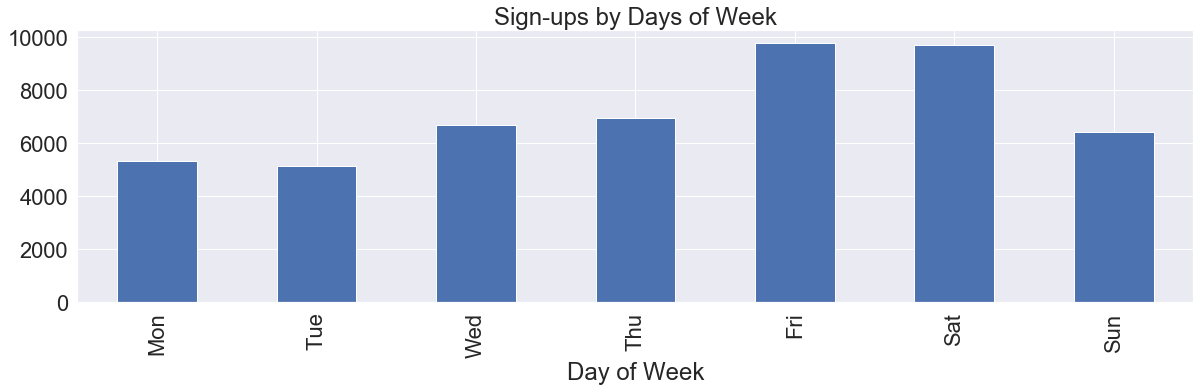

In [65]:
data["signup_dayofweek"] = data.signup_date.dt.dayofweek

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = data.groupby("signup_dayofweek").count()["city"].plot(kind='bar', ax=a, legend=False)
_ = a.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
_ = a.set_xlabel("Day of Week")
_ = a.set_title("Sign-ups by Days of Week")